In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 3 arrays: x = 100 random values between 0 and 100, y = 2x + 10 + random noise, err_y = error on y
x = np.linspace(0, 100, 50)
y = 2. * x + 10. + np.random.normal(0, 5, 50)
err_y = np.random.normal(10, 4, 50)

In [2]:
# Fit the data with a custom parametric function
def linearFunc(x, intercept, slope):
    y = intercept + slope * x
    return y

# Fit the data with curve_fit
from scipy.optimize import curve_fit
a_fit, cov = curve_fit(linearFunc, x, y, sigma=err_y, absolute_sigma=True)

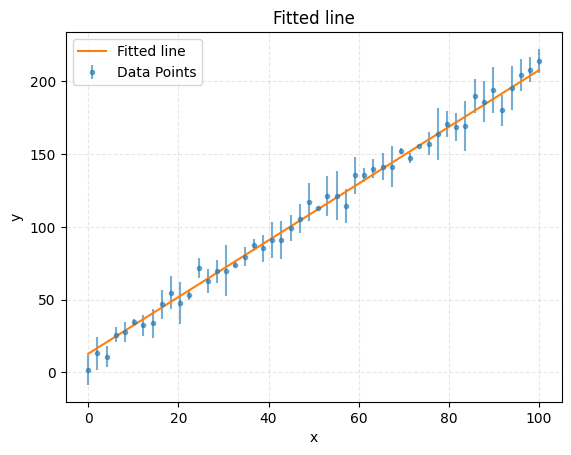

In [3]:
# Get the values of the intercept and the slope of the fitted line, as well as their errors
intercept = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

# Plot the fitted line on the same plot as the data
plt.errorbar(x, y, yerr=err_y, label='Data Points', fmt='.', alpha=0.6)
plt.plot(x, linearFunc(x, intercept, slope), label='Fitted line')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.title('Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()